In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(14,2))
  plt.imshow(x[index])
  plt.xlabel(y[index])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


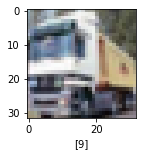

In [ ]:
plot_sample(x_train,y_train,1)

In [ ]:
#Normalize
x_train=x_train/255
x_test=x_test/255

In [ ]:
#model
cnn=models.Sequential([
 #feature extraction
 layers.Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)),
 layers.MaxPooling2D((2,2)),

 #Classification
 layers.Flatten(),
 layers.Dense(64,activation='relu'),
 layers.Dense(10,activation='softmax')                      
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4955 - accuracy: 0.4681
Epoch 2/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2080 - accuracy: 0.5772
Epoch 3/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1052 - accuracy: 0.6161
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0290 - accuracy: 0.6396
Epoch 5/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9726 - accuracy: 0.6599
Epoch 6/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9200 - accuracy: 0.6817
Epoch 7/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8766 - accuracy: 0.6931
Epoch 8/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8384 - accuracy: 0.7095
Epoch 9/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8063 - accuracy: 0.7169
Epoch 10/20
1563/1563 [==============================] - 32s 21m

In [ ]:
y_pred=cnn.predict(x_test)

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.3166 - accuracy: 0.6134


[1.3166470527648926, 0.6133999824523926]

In [ ]:
y_test=y_test.reshape(-1,)
y_pred=cnn.predict(x_test)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
print("Classification report:\n",classification_report(y_test,y_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65      1000
           1       0.82      0.65      0.72      1000
           2       0.48      0.50      0.49      1000
           3       0.41      0.46      0.43      1000
           4       0.64      0.45      0.53      1000
           5       0.49      0.53      0.51      1000
           6       0.74      0.68      0.70      1000
           7       0.65      0.69      0.67      1000
           8       0.70      0.77      0.73      1000
           9       0.65      0.76      0.70      1000

    accuracy                           0.61     10000
   macro avg       0.62      0.61      0.61     10000
weighted avg       0.62      0.61      0.61     10000

